# Imports

In [ ]:
import networkx as nx
import dill as pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import scipy.optimize as opt
import copy
from mpl_toolkits.basemap import Basemap

# Reading the pickled graphs

In [ ]:
# Read pickled graphs graph_objects/G_multi_directed.pickle, graph_objects/G_multi_undirected.pickle, graph_objects/G_simple_directed.pickle, graph_objects/G_simple_undirected.pickle
with open('graph_objects/G_multi_directed.pickle', 'rb') as f:
    G_multi_directed = pickle.load(f)

with open('graph_objects/G_multi_undirected.pickle', 'rb') as f:
    G_multi_undirected = pickle.load(f)

with open('graph_objects/G_simple_directed.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)

with open('graph_objects/G_simple_undirected.pickle', 'rb') as f:
    G_simple_undirected = pickle.load(f)

# Analysis

## Number of edges and nodes

In [ ]:
# Print the number of nodes and edges in each graph in a human-readable format
print("G_multi_directed has", G_multi_directed.number_of_nodes(), "nodes and", G_multi_directed.number_of_edges(), "edges.")
print("G_multi_undirected has", G_multi_undirected.number_of_nodes(), "nodes and", G_multi_undirected.number_of_edges(), "edges.")
print("G_simple_directed has", G_simple_directed.number_of_nodes(), "nodes and", G_simple_directed.number_of_edges(), "edges.")
print("G_simple_undirected has", G_simple_undirected.number_of_nodes(), "nodes and", G_simple_undirected.number_of_edges(), "edges.")

## Degree distribution

In [ ]:
# Create a figure and axes for each plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the degree distribution of G_multi_directed
axs[0, 0].hist(list(dict(G_multi_directed.degree()).values()), bins=50, alpha=0.5)
axs[0, 0].set_xlabel('Degree')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Degree Distribution - G_multi_directed')

# Plot the degree distribution of G_multi_undirected
axs[0, 1].hist(list(dict(G_multi_undirected.degree()).values()), bins=50, alpha=0.5)
axs[0, 1].set_xlabel('Degree')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Degree Distribution - G_multi_undirected')

# Plot the degree distribution of G_simple_directed
axs[1, 0].hist(list(dict(G_simple_directed.degree()).values()), bins=50, alpha=0.5)
axs[1, 0].set_xlabel('Degree')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Degree Distribution - G_simple_directed')

# Plot the degree distribution of G_simple_undirected
axs[1, 1].hist(list(dict(G_simple_undirected.degree()).values()), bins=50, alpha=0.5)
axs[1, 1].set_xlabel('Degree')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Degree Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Shortest path distribution

In [ ]:
# Compute all pairs shortest path lengths for all graphs
G_multi_directed_shortest_path_lengths = dict(nx.shortest_path_length(G_multi_directed))
G_multi_undirected_shortest_path_lengths = dict(nx.shortest_path_length(G_multi_undirected))
G_simple_directed_shortest_path_lengths = dict(nx.shortest_path_length(G_simple_directed))
G_simple_undirected_shortest_path_lengths = dict(nx.shortest_path_length(G_simple_undirected))

# Flatten the dictionary to a list of lengths
G_multi_directed_shortest_path_lengths = [length for lengths in G_multi_directed_shortest_path_lengths.values() for length in lengths.values()]
G_multi_undirected_shortest_path_lengths = [length for lengths in G_multi_undirected_shortest_path_lengths.values() for length in lengths.values()]
G_simple_directed_shortest_path_lengths = [length for lengths in G_simple_directed_shortest_path_lengths.values() for length in lengths.values()]
G_simple_undirected_shortest_path_lengths = [length for lengths in G_simple_undirected_shortest_path_lengths.values() for length in lengths.values()]

# Plot the distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(G_multi_directed_shortest_path_lengths, bins=50, alpha=0.5)
axs[0, 0].set_xlabel('Shortest Path Length')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Shortest Path Length Distribution - G_multi_directed')

axs[0, 1].hist(G_multi_undirected_shortest_path_lengths, bins=50, alpha=0.5)
axs[0, 1].set_xlabel('Shortest Path Length')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Shortest Path Length Distribution - G_multi_undirected')

axs[1, 0].hist(G_simple_directed_shortest_path_lengths, bins=50, alpha=0.5)
axs[1, 0].set_xlabel('Shortest Path Length')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Shortest Path Length Distribution - G_simple_directed')

axs[1, 1].hist(G_simple_undirected_shortest_path_lengths, bins=50, alpha=0.5)
axs[1, 1].set_xlabel('Shortest Path Length')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Shortest Path Length Distribution - G_simple_undirected')

plt.tight_layout()
plt.show()

## Ye et al. (2022): "Topology Analysis of Natural Gas Pipeline Networks Based on Complex Network Theory"

In [ ]:
def plot_cumulative_degree_distribution(G, title):
    
    # Get the degree sequence
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    
    # Create a cumulative distribution in decreasing order
    degreeCount = np.unique(degree_sequence, return_counts=True)
    cdf = np.cumsum(degreeCount[1][::-1])[::-1] / len(degree_sequence)
    
    # Sort the degree and cdf arrays in descending order
    degreeCount = degreeCount[0][::-1]
    cdf = cdf[::-1]
    
    return degreeCount, cdf
                
# Create a figure and axes for each plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the cumulative degree distribution of G_multi_directed
x, y = plot_cumulative_degree_distribution(G_multi_directed, 'Cumulative Degree Distribution - G_multi_directed')
axs[0, 0].plot(x, y, linestyle='-', color='b')
axs[0, 0].set_xlabel('Degree')
axs[0, 0].set_ylabel('Cumulative Probability')
axs[0, 0].set_title('Cumulative Degree Distribution - G_multi_directed')

# Plot the cumulative degree distribution of G_multi_undirected
x, y = plot_cumulative_degree_distribution(G_multi_undirected, 'Cumulative Degree Distribution - G_multi_undirected')
axs[0, 1].plot(x, y, linestyle='-', color='b')
axs[0, 1].set_xlabel('Degree')
axs[0, 1].set_ylabel('Cumulative Probability')
axs[0, 1].set_title('Cumulative Degree Distribution - G_multi_undirected')

# Plot the cumulative degree distribution of G_simple_directed
x, y = plot_cumulative_degree_distribution(G_simple_directed, 'Cumulative Degree Distribution - G_simple_directed')
axs[1, 0].plot(x, y, linestyle='-', color='b')
axs[1, 0].set_xlabel('Degree')
axs[1, 0].set_ylabel('Cumulative Probability')
axs[1, 0].set_title('Cumulative Degree Distribution - G_simple_directed')

# Plot the cumulative degree distribution of G_simple_undirected
x, y = plot_cumulative_degree_distribution(G_simple_undirected, 'Cumulative Degree Distribution - G_simple_undirected')
axs[1, 1].plot(x, y, linestyle='-', color='b')
axs[1, 1].set_xlabel('Degree')
axs[1, 1].set_ylabel('Cumulative Probability')
axs[1, 1].set_title('Cumulative Degree Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Write a similar function to plot the cumulative shortest path length distribution
def plot_cumulative_shortest_path_length_distribution(G, title):
    
    # Compute all pairs shortest path lengths
    shortest_path_lengths = dict(nx.shortest_path_length(G))
    
    # Flatten the dictionary to a list of lengths
    shortest_path_lengths = [length for lengths in shortest_path_lengths.values() for length in lengths.values()]
    
    # Create a cumulative distribution in decreasing order, i.e., 
    shortest_path_lengths = np.array(shortest_path_lengths)
    shortest_path_lengths = shortest_path_lengths[shortest_path_lengths > 0]
    shortest_path_lengths = np.sort(shortest_path_lengths)
    shortest_path_lengths = shortest_path_lengths[::-1]
    cdf = np.cumsum(np.unique(shortest_path_lengths, return_counts=True)[1]) / len(shortest_path_lengths)
    
    return np.unique(shortest_path_lengths), cdf


# Create a figure and axes for each plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the cumulative shortest path length distribution of G_multi_directed
x, y = plot_cumulative_shortest_path_length_distribution(G_multi_directed, 'Cumulative Shortest Path Length Distribution - G_multi_directed')
axs[0, 0].plot(x, len(x) - y, linestyle='-', color='b')
axs[0, 0].set_xlabel('Shortest Path Length')
axs[0, 0].set_ylabel('Cumulative Probability')
axs[0, 0].set_title('Cumulative Shortest Path Length Distribution - G_multi_directed')

# Plot the cumulative shortest path length distribution of G_multi_undirected
x, y = plot_cumulative_shortest_path_length_distribution(G_multi_undirected, 'Cumulative Shortest Path Length Distribution - G_multi_undirected')
axs[0, 1].plot(x, len(x) - y, linestyle='-', color='b')
axs[0, 1].set_xlabel('Shortest Path Length')
axs[0, 1].set_ylabel('Cumulative Probability')
axs[0, 1].set_title('Cumulative Shortest Path Length Distribution - G_multi_undirected')

# Plot the cumulative shortest path length distribution of G_simple_directed
x, y = plot_cumulative_shortest_path_length_distribution(G_simple_directed, 'Cumulative Shortest Path Length Distribution - G_simple_directed')
axs[1, 0].plot(x, len(x) - y, linestyle='-', color='b')
axs[1, 0].set_xlabel('Shortest Path Length')
axs[1, 0].set_ylabel('Cumulative Probability')
axs[1, 0].set_title('Cumulative Shortest Path Length Distribution - G_simple_directed')

# Plot the cumulative shortest path length distribution of G_simple_undirected
x, y = plot_cumulative_shortest_path_length_distribution(G_simple_undirected, 'Cumulative Shortest Path Length Distribution - G_simple_undirected')
axs[1, 1].plot(x, len(x) - y, linestyle='-', color='b')
axs[1, 1].set_xlabel('Shortest Path Length')
axs[1, 1].set_ylabel('Cumulative Probability')
axs[1, 1].set_title('Cumulative Shortest Path Length Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Clustering

In [ ]:
# Write a function to plot the clustering coefficient distribution of a graph
def plot_clustering_coefficient_distribution(G, title):
    
    # Compute the clustering coefficients
    clustering_coefficients = list(nx.clustering(G).values())

    # Return the clustering coefficients
    return clustering_coefficients

# Create a figure and axes for each plot
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the clustering coefficient distribution of G_simple_directed
x = list(nx.clustering(G_simple_directed).values())
axs[0].hist(x, bins=50, alpha=0.5)
axs[0].set_xlabel('Clustering Coefficient')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Clustering Coefficient Distribution - G_simple_directed')

# Plot the clustering coefficient distribution of G_simple_undirected
x = list(nx.clustering(G_simple_undirected).values())
axs[1].hist(x, bins=50, alpha=0.5)
axs[1].set_xlabel('Clustering Coefficient')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Clustering Coefficient Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


## Betweenness centrality

In [ ]:
# Create a figure and axes for each plot
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the betweenness centrality distribution of G_simple_directed
x = list(nx.betweenness_centrality(G_simple_directed).values())
axs[0].hist(x, bins=50, alpha=0.5)
axs[0].set_xlabel('Betweenness Centrality')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Betweenness Centrality Distribution - G_simple_directed')

# Plot the betweenness centrality distribution of G_simple_undirected
x = list(nx.betweenness_centrality(G_simple_undirected).values())
axs[1].hist(x, bins=50, alpha=0.5)
axs[1].set_xlabel('Betweenness Centrality')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Betweenness Centrality Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Bridge, articulation point, and biconnected components

In [ ]:
# Using G_multi_undirected, plot the bridges and articulation points of the graph

# Compute the positions of the nodes
pos = {node: (G_multi_undirected.nodes[node]['long'], G_multi_undirected.nodes[node]['lat']) for node in G_multi_undirected.nodes}

# Give the node a specific color if it is an articulation point, by creating a dictionary of colors
node_colors = {node: 'blue' for node in G_multi_undirected.nodes()}

# Compute the articulation points
articulation_points = list(nx.articulation_points(G_multi_undirected))

# Change the color of the articulation points
for node in articulation_points:
    node_colors[node] = 'red'

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Convert the graph coordinates to the map projection coordinates
pos_map = {node: m(node_pos[0], node_pos[1]) for node, node_pos in pos.items()}

# Add legend
legend = {'Articulation point': 'red', 'Non-articulation point': 'blue'}
for label, color in legend.items():
    ax.scatter([], [], c=color, label=label)
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

# Draw the graph
nx.draw(G_multi_undirected, pos_map, with_labels=False, font_weight='bold', ax=ax, node_size=5, node_color=list(node_colors.values()), edge_color='gray')

# Show the plot
plt.show()

## Sinks and sources

In [ ]:
# Using G_simple_directed, plot the sinks and sources of the graph. A sink is a node with out-degree 0, and a source is a node with in-degree 0.
in_degree = dict(G_simple_directed.in_degree())
out_degree = dict(G_simple_directed.out_degree())
node_colors = {node: 'blue' for node in G_simple_directed.nodes}
for node in G_simple_directed.nodes:
    if in_degree[node] == 0:
        node_colors[node] = 'red'
    if out_degree[node] == 0:
        node_colors[node] = 'green'
    if in_degree[node] == 0 and out_degree[node] == 0:
        node_colors[node] = 'yellow'


# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Convert the graph coordinates to the map projection coordinates
pos_map = {node: m(node_pos[0], node_pos[1]) for node, node_pos in pos.items()}

# Add legend
legend = {'Source': 'red', 'Sink': 'green', 'Regular': 'blue'}
for label, color in legend.items():
    ax.scatter([], [], c=color, label=label)
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')


nx.draw(G_simple_directed, pos_map, with_labels=False, node_size=5, node_color=list(node_colors.values()))
plt.show()

## Compressors and conjunctions

In [ ]:
# Using G_multi_undirected, plot the compressors and conjunctions of the graph. A compressor is a node with degree <= 2, and a conjunction is a node with degree >= 3.
node_colors = {node: 'blue' for node in G_multi_undirected.nodes}
for node in G_multi_undirected.nodes:
    if G_multi_undirected.degree(node) <= 2:
        node_colors[node] = 'red'
    if G_multi_undirected.degree(node) >= 3:
        node_colors[node] = 'green'

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Convert the graph coordinates to the map projection coordinates
pos_map = {node: m(node_pos[0], node_pos[1]) for node, node_pos in pos.items()}

# Add legend
legend = {'Compressor': 'red', 'Conjunction': 'green'}
for label, color in legend.items():
    ax.scatter([], [], c=color, label=label)
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

nx.draw(G_multi_undirected, pos_map, with_labels=False, node_size=5, node_color=list(node_colors.values()))
plt.show()

## Bridges

In [ ]:
# For G_multi_undirected, plot the graph with the edge color determined by whether or not the edge is a bridge

# Compute the bridges
bridges = list(nx.bridges(G_multi_undirected))

# Create a list of colors for the edges
edge_colors = []
for edge in G_multi_undirected.edges:
    if edge[0:2] in bridges:
        edge_colors.append('red')
    else:
        edge_colors.append('blue')

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Convert the graph coordinates to the map projection coordinates
pos_map = {node: m(node_pos[0], node_pos[1]) for node, node_pos in pos.items()}

# Add legend
legend = {'Bridge': 'red', 'Non-bridge': 'blue'}
for label, color in legend.items():
    ax.scatter([], [], c=color, label=label)

ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

nx.draw(G_multi_undirected, pos_map, with_labels=False, node_size=5, edge_color=edge_colors)
plt.show()

## Max-flow

In [ ]:
# Solve the max-flow problem
def solve_MFMSS(graph):
    
    # Set the sources and sinks
    sources = [node for node in G_simple_directed.nodes if in_degree[node] == 0]
    sinks = [node for node in G_simple_directed.nodes if out_degree[node] == 0]
    
    # Create a copy of the graph with the same nodes, edges, and edge attributes
    graph_ = copy.deepcopy(graph)

    # Create a super-source and super-sink
    graph_.add_node('super_source')
    graph_.add_node('super_sink')

    # Add edges from the super-source to the sources and from the sinks to the super-sink
    for source in sources:
        graph_.add_edge('super_source', source, max_cap_M_m3_per_d=float('inf'))
    for sink in sinks:
        graph_.add_edge(sink, 'super_sink', max_cap_M_m3_per_d=float('inf'))
    
    # Return the solution to the max-flow problem
    return nx.maximum_flow(graph_, 'super_source', 'super_sink', capacity='max_cap_M_m3_per_d')

In [ ]:
# Solve the max-flow problem
flow_value, flow_dict = solve_MFMSS(G_simple_directed)

In [ ]:
# Plot the graph where the color of the edges is a gradient from blue to red, where blue is the minimum flow and red is the maximum flow.
# Normalize the edge colors and create a figure and axis for the plot. Use BaseMap to underlay a map of Europe, and draw the graph on top of it.

# Plot the graph where the color of the edges is a gradient from blue to red, where blue is the minimum flow and red is the maximum flow
edge_colors = [flow_dict[u][v] for u, v in G_simple_directed.edges]

# Normalize the edge colors
for i in range(len(edge_colors)):
    edge_colors[i] = (edge_colors[i] - min(edge_colors)) / (max(edge_colors) - min(edge_colors))

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Convert the graph coordinates to the map projection coordinates
pos_map = {node: m(node_pos[0], node_pos[1]) for node, node_pos in pos.items()}

# Draw the graph on top of the map
nx.draw(G_simple_directed, pos_map, with_labels=False, node_size=5, edge_color=edge_colors, edge_cmap=plt.cm.Reds, ax=ax)

# Show the plot
plt.show()

## Clustering coefficient on the map

In [ ]:
# Plot the graph with the node color determined by the clustering coefficient
node_colors = [nx.clustering(G_simple_undirected, node) for node in G_simple_undirected.nodes]

# Normalize the node colors
for i in range(len(node_colors)):
    node_colors[i] = (node_colors[i] - min(node_colors)) / (max(node_colors) - min(node_colors))

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Convert the graph coordinates to the map projection coordinates
pos_map = {node: m(node_pos[0], node_pos[1]) for node, node_pos in pos.items()}

# Draw the graph on top of the map
nx.draw(G_simple_directed, pos_map, with_labels=False, node_size=5, node_color=node_colors, cmap=plt.cm.Reds)

# Show the plot
plt.show()


In [ ]:
# Perform an N-k analysis, and plot the results.

# Calculate the max-flow closeness centrality for each edge, as the ratio of the flow crossing the edge to the total max-flow value
# For each iteration calculate the max-flow value and the max-flow closeness centrality for each edge
max_flow_values = []
max_flow_closeness_centralities = []

# Create a copy of the graph with the same nodes, edges, and edge attributes
G = copy.deepcopy(G_simple_directed)


num_edges = G.number_of_edges()

for i in range(1, G.number_of_edges()):

    # Print the progress
    print('Iteration', i, 'of', num_edges, end='\r')
    
    # Remove the edge with the smallest betweenness centrality
    betweenness_centrality = nx.edge_betweenness_centrality(G)
    edge_to_remove = min(betweenness_centrality, key=betweenness_centrality.get)
    G.remove_edge(*edge_to_remove)
    
    # Solve the max-flow problem
    flow_value, flow_dict = solve_MFMSS(G)
    
    # Calculate the max-flow closeness centrality for each edge
    try:
        max_flow_closeness_centralities.append([flow_dict[u][v] / flow_value for u, v in G.edges])
    except ZeroDivisionError:
        # If the max-flow value is 0, end the loop
        break
    
    # Append the max-flow value
    max_flow_values.append(flow_value)

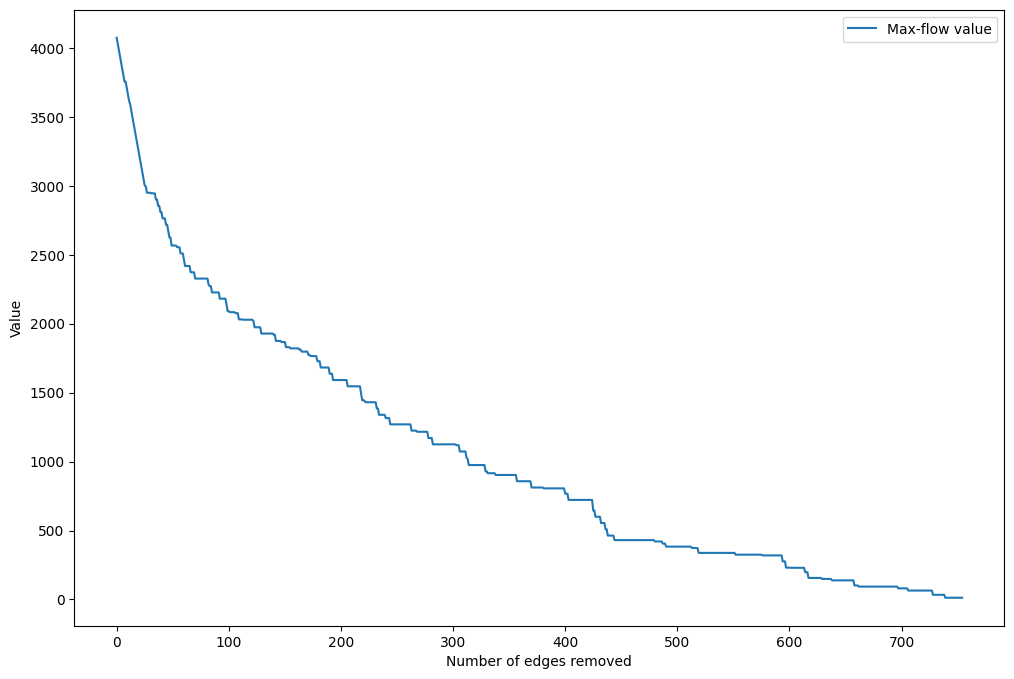

In [21]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(max_flow_values, label='Max-flow value')
ax.set_xlabel('Number of edges removed')
ax.set_ylabel('Value')
ax.legend()
plt.show()